In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
cars = pd.read_csv('divar_cars_cat_price_nlp.csv', index_col=0)
prides = cars.loc[cars['brand_Pride'] == 1][cars.columns.drop(list(cars.filter(regex='brand_')))]
prides

image_count   mileage  price_cat   age  city_Ahvaz  city_Isfahan  \
5                 1  200000.0          1   8.0           1             0   
6                 3       1.0          0  15.0           0             0   
8                 3  250000.0          1   7.0           0             1   
10                4  250000.0          0  12.0           0             0   
13                2  135000.0          1  10.0           0             0   
...             ...       ...        ...   ...         ...           ...   
103786            4     370.0          0  14.0           0             0   
103793            2  340000.0          0  19.0           0             0   
103796            3  140000.0          1  11.0           0             1   
103797            4  123000.0          0  16.0           0             0   
103798            3   43000.0          2   2.0           0             0   

        city_Karaj  city_Kermanshah  city_Mashhad  city_Qom  ...  \
5                0                0             0         0  ...   
6                0                0             0         0  ...   
8                0                0             0         0  ...   
10               0                0             1         0  ...   
13               0                1             0         0  ...   
...            ...              ...           ...       ...  ...   
103786           1                0             0         0  ...   
103793           0                0             0         0  ...   
103796           0                0             0         0  ...   
103797           1                0             0         0  ...   
103798           0                0             0         0  ...   

        desc_کوچکترین  desc_گارانتی  desc_گانه  desc_گلگیر  desc_گیر  \
5                 0.0           0.0        0.0         0.0       0.0   
6                 0.0           0.0        0.0         0.0       0.0   
8                 0.0           0.0        0.0         0.0       0.0   
10                0.0           0.0        0.0         0.0       0.0   
13                0.0           0.0        0.0         0.0       0.0   
...               ...           ...        ...         ...       ...   
103786            0.0           0.0        0.0         0.0       0.0   
103793            0.0           0.0        0.0         0.0       0.0   
103796            0.0           0.0        0.0         0.0       0.0   
103797            0.0           0.0        0.0         0.0       0.0   
103798            0.0           0.0        0.0         0.0       0.0   

        desc_گیربکس  desc_یه   desc_یک  desc_یکسال  desc_۹۶  
5               0.0      0.0  0.248739         0.0      0.0  
6               0.0      0.0  0.000000         0.0      0.0  
8               0.0      0.0  0.206117         0.0      0.0  
10              0.0      0.0  0.000000         0.0      0.0  
13              0.0      0.0  0.182866         0.0      0.0  
...             ...      ...       ...         ...      ...  
103786          0.0      0.0  0.000000         0.0      0.0  
103793          0.0      0.0  0.000000         0.0      0.0  
103796          0.0      0.0  0.000000         0.0      0.0  
103797          0.0      0.0  0.000000         0.0      0.0  
103798          0.0      0.0  0.000000         0.0      0.0  

[30487 rows x 320 columns]

In [89]:
# corr = prides.corr()
# f, ax = plt.subplots(figsize=(15, 12))
# # cmap= ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'seismic']
# sns.heatmap(corr, ax=ax, linewidths=0.1)

# Random Forest train and test
split dataset into 4:1 and apply RF classifier

In [90]:
from sklearn.model_selection import train_test_split
X = prides.drop(columns=['price_cat'])
Y = prides['price_cat']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.ensemble import RandomForestClassifier

rf_depth = 9
clf = RandomForestClassifier(max_depth=rf_depth, n_estimators=100)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##### accuracy

In [91]:
from sklearn.metrics import accuracy_score
Y_train_pred = clf.predict(X_train)
acc_train = accuracy_score(Y_train, Y_train_pred)
Y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(Y_test, Y_test_pred)
print(' Model:      {}\n Max Depth:  {}\n label:      {}\n categories: {}\n Accuracy:   {:.2f}% @train\n Accuracy:   {:.2f}% @test\n '
      .format('Random Forest', rf_depth, 'price_cat', len(prides['price_cat'].unique()), acc_test*100, acc_train*100))

 Model:      Random Forest
 Max Depth:  9
 label:      price_cat
 categories: 3
 Accuracy:   81.12% @train
 Accuracy:   84.16% @test
 


##### confusion matrix

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix_random_forest = pd.DataFrame(confusion_matrix(Y_test, Y_test_pred))
confusion_matrix_random_forest
# this pandas output looks better tha the default!

0     1     2
0  1721   217    77
1   233  1354   397
2     8   219  1872

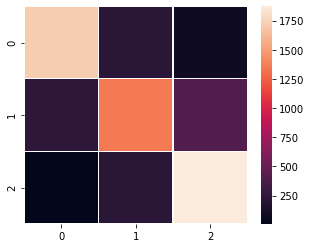

In [93]:
f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(confusion_matrix_random_forest, ax=ax, linewidths=0.1)

### Classification Report

In [94]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       0.88      0.85      0.87      2015
           2       0.76      0.68      0.72      1984
           3       0.80      0.89      0.84      2099

    accuracy                           0.81      6098
   macro avg       0.81      0.81      0.81      6098
weighted avg       0.81      0.81      0.81      6098



In [95]:
# from sklearn.datasets import load_iris
# iris = load_iris()

# # Model (can also use single decision tree)
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=10)

# # Train
# model.fit(iris.data, iris.target)
# # Extract single tree
# estimator = model.estimators_[5]

target_names = ['1', '2', '3']
feature_names = prides.drop(columns=['price_cat']).columns.values
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

## Feature Importance

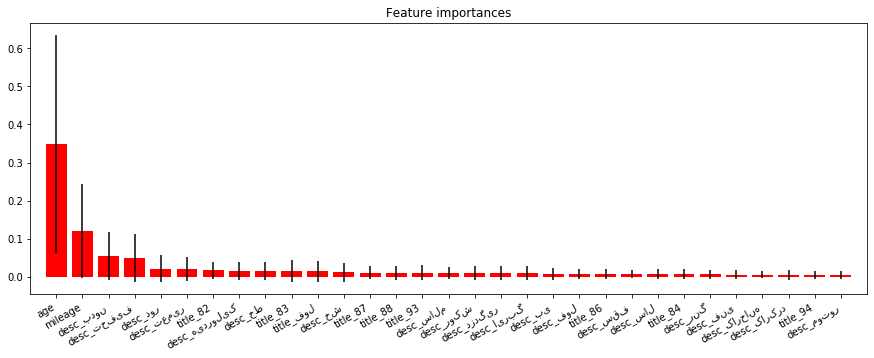

In [96]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_names = prides.drop(columns=['price_cat']).columns.values

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
feature_count = int(X.shape[1]/10)
features = [feature_names[i] for i in indices][:feature_count]
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(feature_count), importances[indices][0:feature_count],
        color="r", yerr=std[indices][0:feature_count], align="center")
plt.xticks(range(feature_count), features, rotation=30, ha="right")
plt.xlim([-1, feature_count])
plt.show()

In [97]:
feature_names = prides.drop(columns=['price_cat']).columns.values
print ("Features sorted by their score:")
sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), feature_names), reverse=True)

Features sorted by their score:


[(0.3482, 'age'),
 (0.12, 'mileage'),
 (0.0542, 'desc_بدون'),
 (0.0503, 'desc_تخفیف'),
 (0.0213, 'desc_دور'),
 (0.0201, 'desc_تعمیر'),
 (0.0168, 'title_82'),
 (0.0151, 'desc_هیدرولیک'),
 (0.015, 'desc_خط'),
 (0.0149, 'title_83'),
 (0.0142, 'title_فول'),
 (0.0117, 'desc_خش'),
 (0.0109, 'title_87'),
 (0.0108, 'title_88'),
 (0.0102, 'title_93'),
 (0.01, 'desc_سالم'),
 (0.0099, 'desc_روکش'),
 (0.0098, 'desc_دزدگیر'),
 (0.0093, 'desc_ایربگ'),
 (0.0078, 'desc_بی'),
 (0.0076, 'desc_فول'),
 (0.0075, 'title_86'),
 (0.0074, 'desc_سقف'),
 (0.007, 'desc_سال'),
 (0.0065, 'title_84'),
 (0.0065, 'desc_رنگ'),
 (0.0055, 'desc_کارخانه'),
 (0.0055, 'desc_فنی'),
 (0.0052, 'desc_کارکرد'),
 (0.0051, 'title_94'),
 (0.0051, 'desc_موتور'),
 (0.0049, 'title_92'),
 (0.0048, 'desc_جلو'),
 (0.0047, 'title_91'),
 (0.0044, 'desc_تازه'),
 (0.0043, 'desc_زاپاس'),
 (0.004, 'desc_بیمه'),
 (0.0039, 'title_89'),
 (0.0039, 'title_85'),
 (0.0034, 'desc_عقب'),
 (0.0032, 'title_90'),
 (0.0029, 'title_پراید'),
 (0.0027, 'desc_